### Students' Knowledge Status

Name: 

Introduction:
The objective of any class should be to increase student’s understanding of the topic subject. Students with a high understanding of class material will enter the workforce with the tools they need to succeed in their relevant subjects. We will classify students' understanding of class materials based on five quantitative variables taken from Kahraman et al’s User Knowledge Modeling dataset.
The question our project will try to answer is : Can we predict student's knowledge level based on academic performance parameters using the Knn-classification algorithm?

Data Set information: 
The dataset was collected by Ka​​hraman et al. The weighting system and development of quantitative measurements for the variables was done using Kahramans rule based system which gives quantitative values to students' performances in certain academic related tasks. the tasks Kahraman rates are the columns of our data set labeled below:


STG: Refers to Study time rating(0-1), the amount time spend studying about Electrical DC Machines 

SCG:  Refers to Repetition rating(0-1),  the amount of problems, material the student worked on. For example, worksheets, tutorials.

PEG: Refers to the exam performance rating of the subject(0-1), in this case, the exam performance on Electrical DC Machine course.

STR: Refers to Study time rating of related subjects(0-1), the amount of time students spent studying related topics

LPR;  Refers to exam performance rating in related subjects(0-1), exam performance on related material, or background information.

UNS: Refers to student understanding levels; Based on the weighting system Kahramans uses in his rule based system paper, classified  as “Very-low” “Low”, “Middle”, or “High” Understanding of Electrical DC Machines. 

Preliminary exploratory data analysis:

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(readxl)
options(repr.matrix.max.rows = 6)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [11]:
url <- "https://github.com/JackyLinllk/ubc_dsci100_assignment/raw/main/data/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.csv"

data_training<-read_csv(url)|>
    select(STG:UNS)|>
    mutate(UNS = as.factor(UNS))
data_training


New names:
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
Rows: 258 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): UNS
dbl (5): STG, SCG, STR, LPR, PEG
lgl (3): ...7, ...8, ...9

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
⋮,⋮,⋮,⋮,⋮,⋮
0.54,0.82,0.71,0.29,0.77,High
0.50,0.75,0.81,0.61,0.26,Middle
0.66,0.90,0.76,0.87,0.74,High


In [3]:
data_training_na <- sum(is.na(data_training))
data_training_na

data_training_summary <- data_training|>
    group_by(UNS)|>
    summarize(count = n())
data_training_summary

data_training_mean <- data_training |>
    summarize(across(STG:PEG, mean))|>
    pivot_longer(STG:PEG, names_to = "Variable", values_to = "Mean")|>
    select(Mean)

data_training_min <- data_training |>
    summarize(across(STG:PEG, min))|>
    pivot_longer(STG:PEG, names_to = "Variable", values_to = "Min")|>
    select(Min)
    
data_training_max <- data_training |>
    summarize(across(STG:PEG, max))|>
    pivot_longer(STG:PEG, names_to = "Variable", values_to = "Max") 

data_training_value_Summary <- bind_cols(data_training_max, data_training_mean, data_training_min)
data_training_value_Summary

[1] 0

UNS,count
<fct>,<int>
High,63
Low,83
Middle,88
very_low,24


Variable,Max,Mean,Min
<chr>,<dbl>,<dbl>,<dbl>
STG,0.99,0.3711473,0
SCG,0.90,0.3556744,0
STR,0.95,0.4680039,0
LPR,0.99,0.4327132,0
PEG,0.93,0.4585388,0


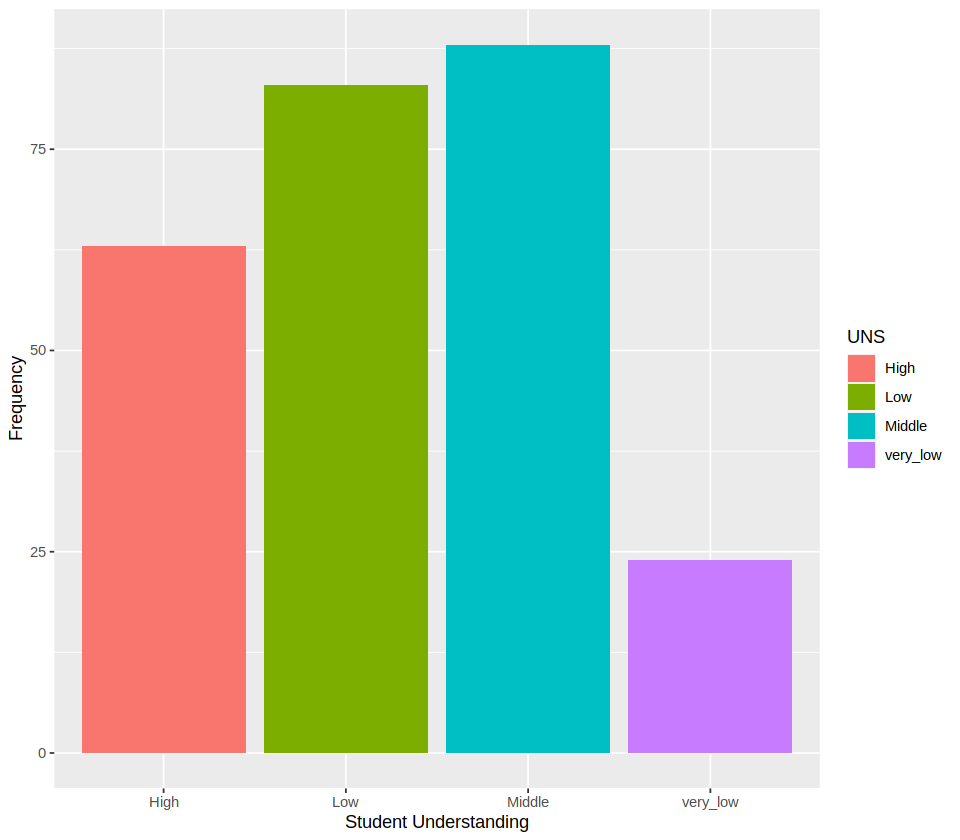

In [14]:
UNS_count_plot <- ggplot(data_training_summary, aes(x = UNS, y = count, fill = UNS)) + 
    geom_bar(stat = "identity") +
    xlab("Student Understanding") +
    ylab("Frequency")
UNS_count_plot

In [ ]:
options(repr.plot.height = 7, repr.plot.width = 8)
data_plot_3 <- ggplot(data_training, aes(x= LPR,y= PEG, color = UNS))+
    geom_point() +
    labs(x="Exam performance Rating \n in Related Subject (0-1) ", y= "Exam performance Rating \n in Subject", color = "Knowledge level")+
    ggtitle("Exam Performance vs Exam performance in Related Subject")+
    theme(text = element_text(size = 15))
data_plot_3

The scatter plot above is selected because it demonstrated the most obvious distinctions between the different knowledge levels(we plotted the other ones too). We visualized the variables against each other and found the two most significant factors that decided the classification of students' understanding was Exam results and Related Material knowledge. 


Methods:

We will use the K-nn classification algorithm, selecting the optimal k value through cross-validation to classify the knowledge level students have of the subject matter. 

We plan to use all the numerical variables, because these all contribute to and reflect how well the student understands the material. In addition, According to the paper, the STG-PEG variables were all considered in the labeling of the origin student knowledge level (UNS).

After We have our results, we will create a bar graph displaying the predicted counts of each category compared to the actual counts of each category of UNS

Expected outcomes and significance:
We expect to find that students who received the highest scores across all 5 variables will have a “High” Knowlege score. If we can find a variable that has a more significant effect on students' knowledge score we can focus more research on what habits students and teachers can employ to improve that most impactful variable.